In [32]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:
def calculate_quality(original_image, compressed_image):
    original = Image.open(original_image)
    compressed = Image.open(compressed_image)
    
    # Oblicz odległość w przestrzeni RGB między pikselami obrazów
    distance = 0
    for x in range(original.width):
        for y in range(original.height):
            original_pixel = original.getpixel((x, y))
            compressed_pixel = compressed.getpixel((x, y))
            for i in range(3):  # dla każdego kanału koloru (R, G, B)
                distance += abs(original_pixel[i] - compressed_pixel[i]) ** 2
    return np.sqrt(distance)

def compression_ratio(original_size, compressed_size):
    return compressed_size / original_size

In [48]:
def main():
    # Ścieżki do plików obrazów
    original_image_path = "lena.tiff"
    compressed_images_jp2000 = {
        "QL90": "lena_jp2000_90.jp2",
        "QL70": "lena_jp2000_70.jp2",
        "QL50": "lena_jp2000_50.jp2",
        "QL20": "lena_jp2000_20.jp2",
        "QL5": "lena_jp2000_5.jp2"
    }
    compressed_images = {
        "QL90": "lena_90.jpg",
        "QL70": "lena_70.jpg",
        "QL50": "lena_50.jpg",
        "QL20": "lena_20.jpg",
        "QL5": "lena_5.jpg"
    }
    
    # Oblicz jakość kompresji dla każdego obrazu
    quality_scores_jp2000 = {}
    for ql, compressed_image_path in compressed_images_jp2000.items():
        quality_scores_jp2000[ql] = calculate_quality(original_image_path, compressed_image_path)
        
    quality_scores = {}
    for ql, compressed_image_path in compressed_images.items():
        quality_scores[ql] = calculate_quality(original_image_path, compressed_image_path)

    compression_ratios_jp2000 = {}
    for ql, compressed_image_path in compressed_images_jp2000.items():
        original_size = os.path.getsize(original_image_path)
        compressed_size = os.path.getsize(compressed_image_path)
        compression_ratios_jp2000[ql] = compression_ratio(original_size, compressed_size)
        
    compression_ratios = {}
    for ql, compressed_image_path in compressed_images.items():
        original_size = os.path.getsize(original_image_path)
        compressed_size = os.path.getsize(compressed_image_path)
        compression_ratios[ql] = compression_ratio(original_size, compressed_size)
    
    original_quality = calculate_quality(original_image_path, original_image_path)
    quality_scores_jp2000["Original"] = original_quality
    quality_scores["Original"] = original_quality

    original_ratio = compression_ratio(original_size, original_size)
    compression_ratios_jp2000['Original'] = original_ratio
    compression_ratios['Original'] = original_ratio
    
    jp2000 = {'Original': quality_scores_jp2000.pop('Original')}
    jp2000.update(quality_scores_jp2000)
    jpg = {'Original': quality_scores.pop('Original')}
    jpg.update(quality_scores)

    com_jp2000 = {'Original': compression_ratios_jp2000.pop('Original')}
    com_jp2000.update(compression_ratios_jp2000)
    com_jpg = {'Original': compression_ratios.pop('Original')}
    com_jpg.update(compression_ratios)
    # Wygeneruj wykres zależności jakości od współczynnika kompresji
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.plot(list(com_jp2000.values()), list(jp2000.values()), marker='o', label="JPEG2000", color = 'green')
    axes.plot(list(com_jpg.values()), list(jpg.values()), marker='o', label="JPEG", color = 'red')
    axes.set_title('Zależność jakości kompresji od współczynnika kompresji')
    axes.set_xlabel('Współczynnik kompresji (Stosunek wielkości po/przed kompresja)')
    axes.set_ylabel('Jakość kompresji (odległość w przestrzeni RGB)')
    #axes.set_xlim(np.min(list(com_jp2000.values())), np.max(list(com_jp2000.values()))
    axes.grid(True)
    axes.legend()
    fig.tight_layout()
    fig.savefig("Kompresja_wykres.jpg")

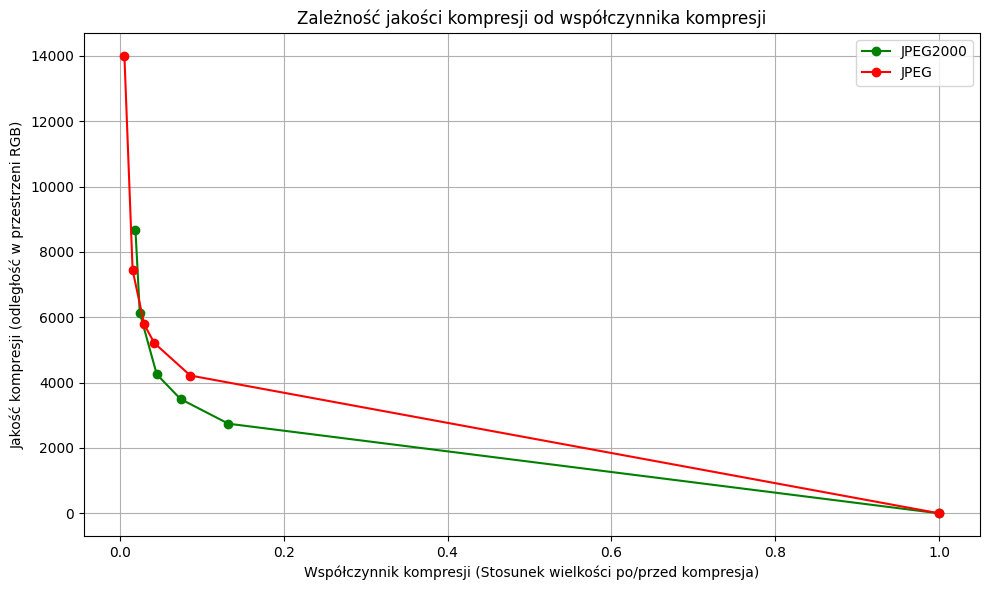

In [49]:
if __name__ == "__main__":
    main()